In [1]:
from keras.models import model_from_json
import tensorflow as tf
from tensorflow import lite
from tensorflow import keras
import numpy 
from tensorflow.keras import layers as l
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import loadtxt
from tensorflow import keras

In [8]:
model = keras.models.load_model('our_model.h5')

In [2]:
path= "/Users/shahrasm/Documents/Graduation_project/"
modelpath=path+"bestmodel"
col=range(71)


In [3]:
test_data = pd.read_csv(path+'test_data.csv',names=col)
Xts = test_data.loc[:,1:]
yts = test_data.loc[:,0]

In [5]:
ts=[]
for c in range(1,71):
    e=Xts[c]
    meanc=np.mean(e) 
    varc=np.var(e) 
    normalize=l.Normalization(mean=meanc,variance=varc)
    e=normalize(e)
    ts.append(e)

In [6]:
Xts=np.array(ts)
Xts=np.transpose(Xts)

In [9]:
predictions = (model.predict(Xts) > 0.5).astype("int32")
for i in range(166):
	print('%d (expected %d)' % ( predictions[i], yts[i]))

0 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
0 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expecte

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
predictions.reshape(-1)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [12]:
y_actu = yts
y_pred = predictions.reshape(-1)

In [14]:
array=confusion_matrix(y_actu,y_pred)

In [15]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

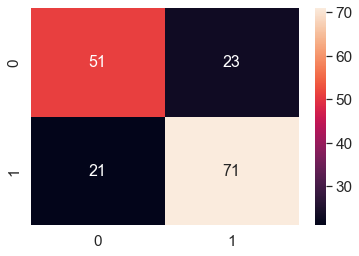

In [16]:
df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()